## Drinking water potability 

Type of Problem: CLassification- Machine Learning 

Domain: Environment, water quality 


Presented by: Aman Deep


In [46]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("drinking_water_potability.csv")

In [3]:
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890456,20791.31898,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.05786,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.54173,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.41744,8.059332,356.886136,363.266516,18.436525,100.341674,4.628771,0
4,9.092223,181.101509,17978.98634,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


### We observe that all are numerical type values 

In [5]:
df.columns

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')

#### Our target variable is potability. in the given data, let us check the distribution of the output variable

## Countplot

countplot shows the frequency of the categorical data

<Axes: xlabel='Potability', ylabel='count'>

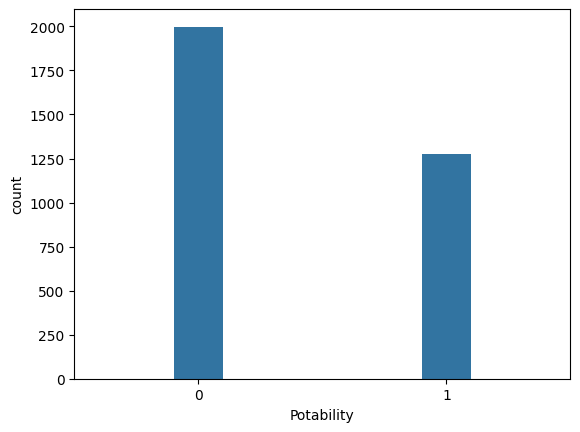

In [6]:
sns.countplot(data=df, x=df.Potability, width=0.2)

## Checking for the missing values 

In [7]:
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

### Note on Handling the missing values 

Methods to Handle Missing Values
#### 1. Mean Imputation

Used for numerical data

Works well when data is normally distributed

Sensitive to outliers
_____________________________________________________
#### 2. Median Imputation

Used for numerical data

Best when data has outliers or skewness

More robust than mean
_____________________________________________________
#### 3. Mode Imputation

Used for categorical data

Replaces with most frequent value

#### We will check the distribution of the columns that are having null values. Based on that we will take the decision. 

### 1) ph

<Axes: xlabel='ph', ylabel='Count'>

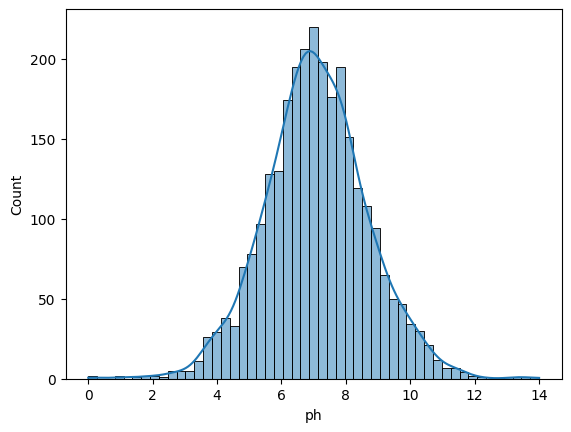

In [8]:
sns.histplot(df['ph'], kde=True)

### Here we observe that data is normally distributed around. Thus we will replace the missing value by mean

In [9]:
df["ph"]=df["ph"].fillna(df["ph"].mean())

### 2) Sulphate

<Axes: xlabel='Sulfate', ylabel='Count'>

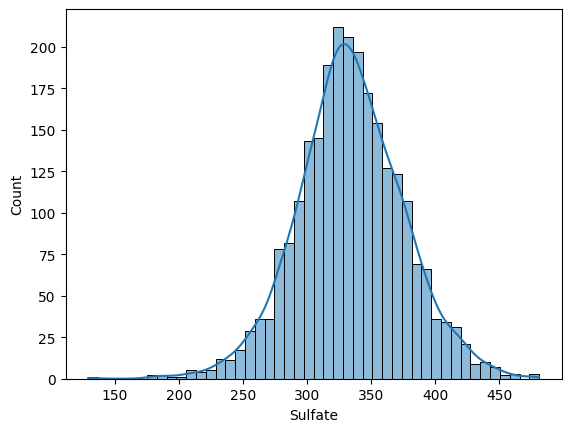

In [10]:
sns.histplot(df['Sulfate'], kde=True)

In [11]:
df["Sulfate"]=df["Sulfate"].fillna(df["Sulfate"].mean())

### 3) Trihalomethanes

<Axes: xlabel='Trihalomethanes', ylabel='Count'>

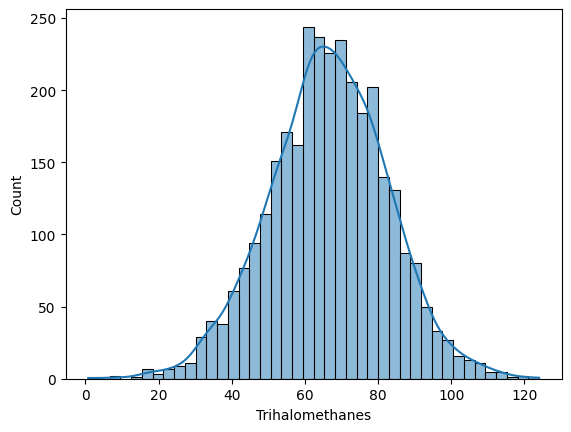

In [12]:
sns.histplot(df['Trihalomethanes'], kde=True)

In [13]:
df["Trihalomethanes"]=df["Trihalomethanes"].fillna(df["Trihalomethanes"].mean())

In [14]:
df.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

#### Handling of the missing value is complete 
_____________________________________________________________________________________________

## Checking and getting insights from the boxplots 

we will check the box plot and try to gain some insights from there 

In [15]:
df.columns

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')

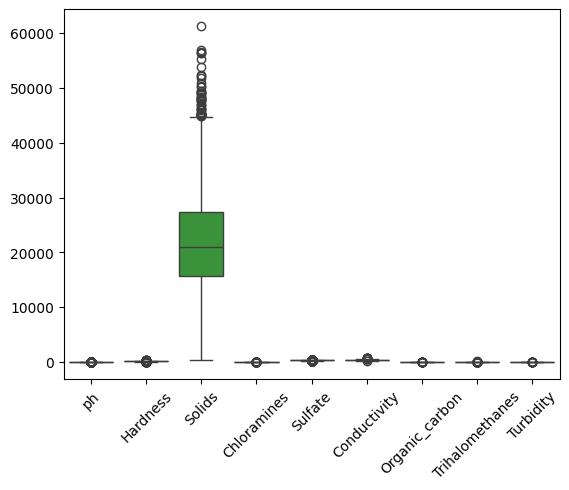

In [16]:
sns.boxplot(data=df.drop(["Potability"], axis=1))
plt.xticks(rotation=45)
plt.show()
# Here I did not want to include the Potability which is the targt cariable in my boxplot analysis

From the box plot one conclusion that we can make is features are on different scales

So we will bring them on same scale through scaling

In [17]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_scaled = sc.fit_transform (df.drop(columns=['Potability']))

In [18]:
X_scaled

array([[ 0.00000000e+00,  2.59194712e-01, -1.39470871e-01, ...,
        -1.18065057e+00,  1.30614943e+00, -1.28629758e+00],
       [-2.28933938e+00, -2.03641367e+00, -3.85986649e-01, ...,
         2.70597241e-01, -6.38479983e-01,  6.84217891e-01],
       [ 6.92867789e-01,  8.47664833e-01, -2.40047337e-01, ...,
         7.81116858e-01,  1.50940874e-03, -1.16736546e+00],
       ...,
       [ 1.59125368e+00, -6.26829230e-01,  1.27080989e+00, ...,
        -9.81329233e-01,  2.18748247e-01, -8.56006782e-01],
       [-1.32951593e+00,  1.04135450e+00, -1.14405809e+00, ...,
        -9.42063817e-01,  7.03468419e-01,  9.50797384e-01],
       [ 5.40150905e-01, -3.85462306e-02, -5.25811938e-01, ...,
         5.60940071e-01,  7.80223466e-01, -2.12445866e+00]],
      shape=(3276, 9))

A very interesting thing to observe here is that after we have done fit_transform with scaler for scaling, out dataframe has become array. This we have to keep in mind. 

We need to convert the X_scaled back to dataframe

In [19]:
X_scaled= pd.DataFrame(X_scaled, columns= df.drop(["Potability"], axis=1).columns)

In [20]:
X_scaled.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
0,0.000000,0.259195,-0.139471,0.112415,0.961357,1.708954,-1.180651,1.306149,-1.286298
1,-2.289339,-2.036414,-0.385987,-0.307694,0.000000,2.062575,0.270597,-0.638480,0.684218
2,0.692868,0.847665,-0.240047,1.360594,0.000000,-0.094032,0.781117,0.001509,-1.167365
3,0.840950,0.547651,0.000493,0.592008,0.639519,-0.778830,1.255134,2.152874,0.848412
4,1.368569,-0.464429,-0.460249,-0.363698,-0.654177,-0.343939,-0.824357,-2.181599,0.138786


### After scaling when we draw the boxplot, you will find boxplot as follows 

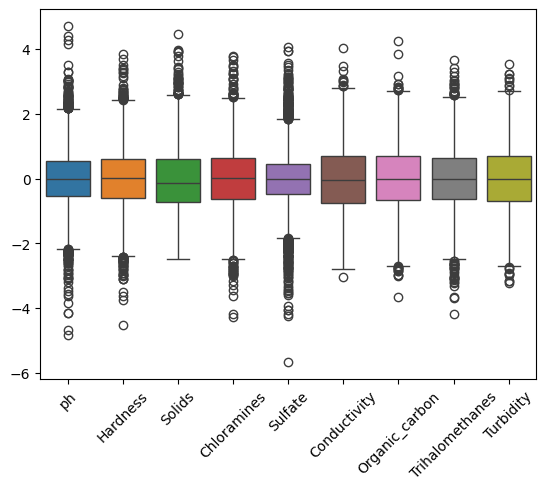

In [21]:
sns.boxplot(data=X_scaled)
plt.xticks(rotation=45)
plt.show()


“Boxplots revealed scale variation and outliers. I handled them using feature scaling and transformation rather than blindly removing data, as outliers may carry important real-world information.”

### handling the outliers

## Here we will do log transformation for demonstration

It will be done on the non scaled data as scaling is to be done after lo transformation

Conductivity seems to be the most skewed feature- We will apply it here

Here is a very interesting article on Handling outliers. Do read it. You will find it interesting. 

https://www.linkedin.com/posts/aman-deep-artemisfowl_outlier-handling-found-a-very-interesting-activity-7413450680960638976-8jJt?utm_source=share&utm_medium=member_desktop&rcm=ACoAACIuGU4BPTiKKMJiLk1pqN-AHzYFimodUi0

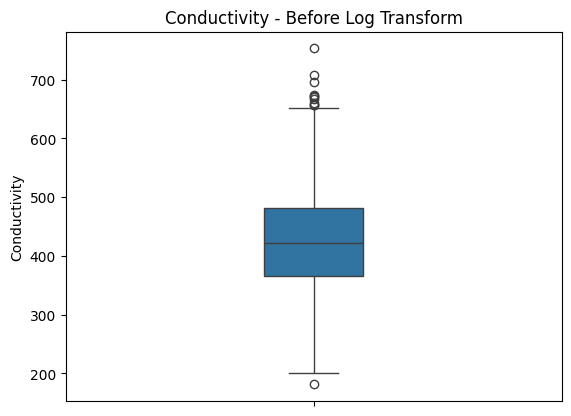

In [22]:
sns.boxplot(data=df['Conductivity'], width= 0.2)
plt.title('Conductivity - Before Log Transform')
plt.show()


In [23]:
df['Conductivity'] = np.log1p(df['Conductivity'])

Text(0.5, 1.0, 'Conductivity- After the Log transform')

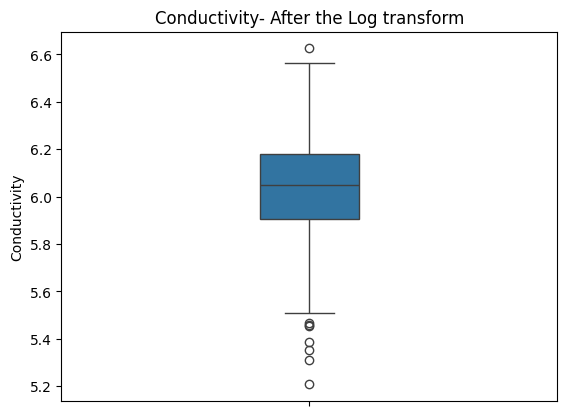

In [24]:
sns.boxplot(data=df["Conductivity"], width=0.2)
plt.title('Conductivity- After the Log transform')

### If the feature distribution in box plot is highly skewed, i.e the tail is very large , then we use log transformation 

#### “Before log transformation, conductivity showed a strong right skew with extreme high values. 

#### After applying log1p, the distribution became more compact and symmetric, reducing the dominance of extreme values while preserving the data.”

## Our data is now ready for modelling

Split the data in train and test 

In [31]:
from sklearn.model_selection import train_test_split

X=X_scaled
y=df["Potability"]

X_train, X_test, y_train, y_test=  train_test_split(X_scaled, y, test_size= 0.2, random_state=42)

## Model Development
### We will use the following models:
- Logistic Regression
- SVM
- Random Forest

## 1. Logistic Regression

In [37]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(X_train, y_train)

,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`mul

In [39]:
y_pred_train= lr.predict(X_train)
y_pred_test = lr.predict(X_test)

In [42]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score

In [51]:
print("Classification Report:", classification_report(y_test, y_pred_test))
print("Accuracy Score is ", accuracy_score(y_test, y_pred_test))
print("ROC AUC Score is ", roc_auc_score(y_test, y_pred_test))
print("confusion matrix is \n", confusion_matrix(y_test, y_pred_test))

Classification Report:               precision    recall  f1-score   support

           0       0.63      1.00      0.77       412
           1       0.00      0.00      0.00       244

    accuracy                           0.63       656
   macro avg       0.31      0.50      0.39       656
weighted avg       0.39      0.63      0.48       656

Accuracy Score is  0.6280487804878049
ROC AUC Score is  0.5
confusion matrix is 
 [[412   0]
 [244   0]]


#### Note that so much coding lines we have to do everytime we want to evaluate a model. 
#### To overcome this, we will make a function

### *We will make a funnction to evaluate the model. This function can be used in all the models

In [60]:
def eval_model(model_obj):
    y_pred_train= model_obj.predict(X_train)
    y_pred_test= model_obj.predict(X_test)

    print("Classification Report:", classification_report(y_test, y_pred_test))
    print("\n Accuracy Score is ", accuracy_score(y_test, y_pred_test))
    print("\n ROC AUC Score is ", roc_auc_score(y_test, y_pred_test))
    print("\n confusion matrix is \n", confusion_matrix(y_test, y_pred_test))    
    

In [61]:
eval_model(lr) #testing the function

Classification Report:               precision    recall  f1-score   support

           0       0.63      1.00      0.77       412
           1       0.00      0.00      0.00       244

    accuracy                           0.63       656
   macro avg       0.31      0.50      0.39       656
weighted avg       0.39      0.63      0.48       656


 Accuracy Score is  0.6280487804878049

 ROC AUC Score is  0.5

 confusion matrix is 
 [[412   0]
 [244   0]]


In [62]:
#### Our function is ready now. We can use this function for evaluation of other models also. 

## 2. SVM

In [63]:
from sklearn.svm import SVC

sv= SVC()
sv.fit(X_train, y_train)


,"C C: float, default=1.0Regularization parameter. The strength of the regularization isinversely proportional to C. Must be strictly positive. The penaltyis a squared l2 penalty. For an intuitive visualization of the effectsof scaling the regularization parameter C, see:ref:`sphx_glr_auto_examples_svm_plot_svm_scale_c.py`.",1.0
,"kernel kernel: {'linear', 'poly', 'rbf', 'sigmoid', 'precomputed'} or callable, default='rbf'Specifies the kernel type to be used in the algorithm. Ifnone is given, 'rbf' will be used. If a callable is given it is used topre-compute the kernel matrix from data matrices; that matrix should bean array of shape ``(n_samples, n_samples)``. For an intuitivevisualization of different kernel types see:ref:`sphx_glr_auto_examples_svm_plot_svm_kernels.py`.",'rbf'
,"degree degree: int, default=3Degree of the polynomial kernel function ('poly').Must be non-negative. Ignored by all other kernels.",3
,"gamma gamma: {'scale', 'auto'} or float, default='scale'Kernel coefficient for 'rbf', 'poly' and 'sigmoid'.- if ``gamma='scale'`` (default) is passed then it uses 1 / (n_features * X.var()) as value of gamma,- if 'auto', uses 1 / n_features- if float, must be non-negative... versionchanged:: 0.22 The default value of ``gamma`` changed from 'auto' to 'scale'.",'scale'
,"coef0 coef0: float, default=0.0Independent term in kernel function.It is only significant in 'poly' and 'sigmoid'.",0.0
,"shrinking shrinking: bool, default=TrueWhether to use the shrinking heuristic.See the :ref:`User Guide `.",True
,"probability probability: bool, default=FalseWhether to enable probability estimates. This must be enabled priorto calling `fit`, will slow down that method as it internally uses5-fold cross-validation, and `predict_proba` may be inconsistent with`predict`. Read more in the :ref:`User Guide `.",False
,"tol tol: float, default=1e-3Tolerance for stopping criterion.",0.001
,"cache_size cache_size: float, default=200Specify the size of the kernel cache (in MB).",200
,"class_weight class_weight: dict or 'balanced', default=NoneSet the parameter C of class i to class_weight[i]*C forSVC. If not given, all classes are supposed to haveweight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.",None
,"verbose verbose: bool, default=FalseEnable verbose output. Note that this setting takes advantage of aper-process runtime setting in libsvm that, if enabled, may not workproperly in a multithreaded context.",False


In [64]:
eval_model(sv)

Classification Report:               precision    recall  f1-score   support

           0       0.70      0.92      0.79       412
           1       0.69      0.32      0.44       244

    accuracy                           0.70       656
   macro avg       0.69      0.62      0.62       656
weighted avg       0.69      0.70      0.66       656


 Accuracy Score is  0.6951219512195121

 ROC AUC Score is  0.6194095177462996

 confusion matrix is 
 [[377  35]
 [165  79]]


## 3. Random Forest 

In [65]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(X_train, y_train)

,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",100
,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.Note: This parameter is tree-specific.",'gini'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=""sqrt""The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to `""sqrt""`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",'sqrt'
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft child, and ``N_t_R`` is the number of samples in the right child.``N``, ``N_t``, ``N_t_R`` and ``N_t_L`` all refer to the weighted sum,if ``sample_weight`` is passed... versionadded:: 0.19",0.0
,"bootstrap bootstrap: bool, default=TrueWhether bootstrap samples are used when building trees. If False, thewhole dataset is used to build each tree.",True
,"oob_score oob_score: bool or callable, default=FalseWhether to use out-of-bag samples to estimate the generalization score.By default, :func:`~sklearn.metrics.accuracy_score` is used.Provide a callable with signature `metric

In [66]:
eval_model(rf)

Classification Report:               precision    recall  f1-score   support

           0       0.69      0.87      0.77       412
           1       0.60      0.34      0.43       244

    accuracy                           0.67       656
   macro avg       0.64      0.60      0.60       656
weighted avg       0.65      0.67      0.64       656


 Accuracy Score is  0.6692073170731707

 ROC AUC Score is  0.6012852140697119

 confusion matrix is 
 [[357  55]
 [162  82]]
